<a href="https://colab.research.google.com/github/plenoi/CMU_DataScience/blob/master/stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Histogram

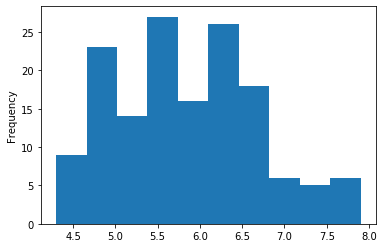

In [3]:
df['sepal length (cm)'].plot(kind='hist')

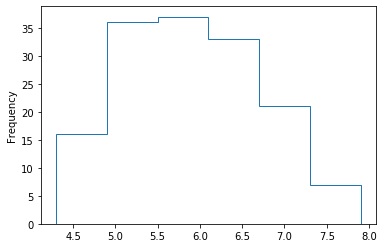

In [6]:
df['sepal length (cm)'].plot(kind='hist', histtype='step', bins=6)

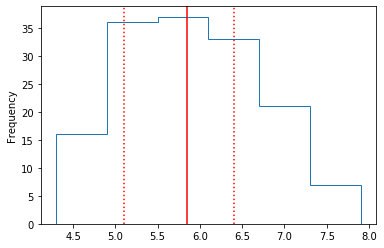

In [12]:
import matplotlib.pyplot as plt
df['sepal length (cm)'].plot(kind='hist', histtype='step', bins=6)
plt.axvline(df['sepal length (cm)'].mean(), c='Red')
plt.axvline(df['sepal length (cm)'].quantile(0.75), c='Red',linestyle=':')
plt.axvline(df['sepal length (cm)'].quantile(0.25), c='Red',linestyle=':')

# Ex 1
Create overlap histogram plot between sepal length (cm) &	sepal width (cm)

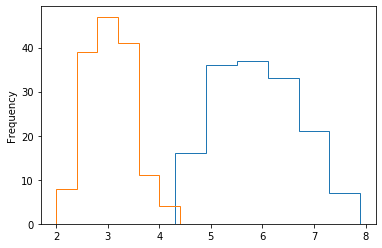

In [49]:
#
#
#

# Density

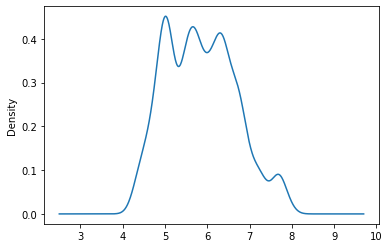

In [20]:
import matplotlib.pyplot as plt
df['sepal length (cm)'].plot(kind='kde', bw_method=0.2)

# Quantile

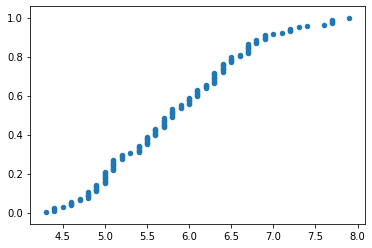

In [43]:
x1 =  df.sort_values(by=['sepal length (cm)'])['sepal length (cm)']
y1 = (pd.Series(range(1,len(x1)+1)) - 0.5)/len(x1)
plt.scatter(x1, y1, s=20)

#Box Plot

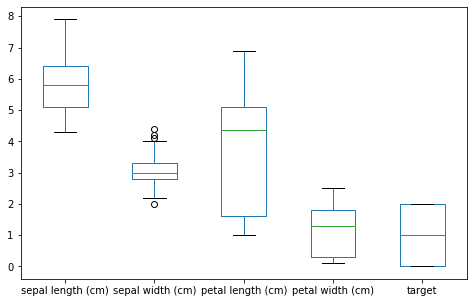

In [46]:
df.plot(kind='box', figsize=(8,5))

# Ex. 2 Scatter plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


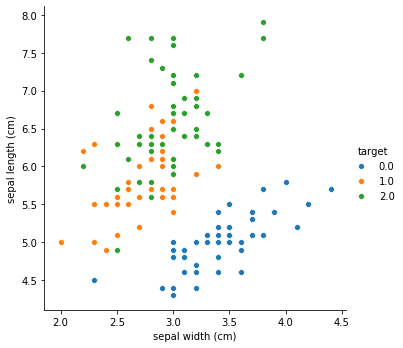

In [74]:
import seaborn as sns
sns.pairplot ...

#Ex. 3 Scatter plot matrix

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


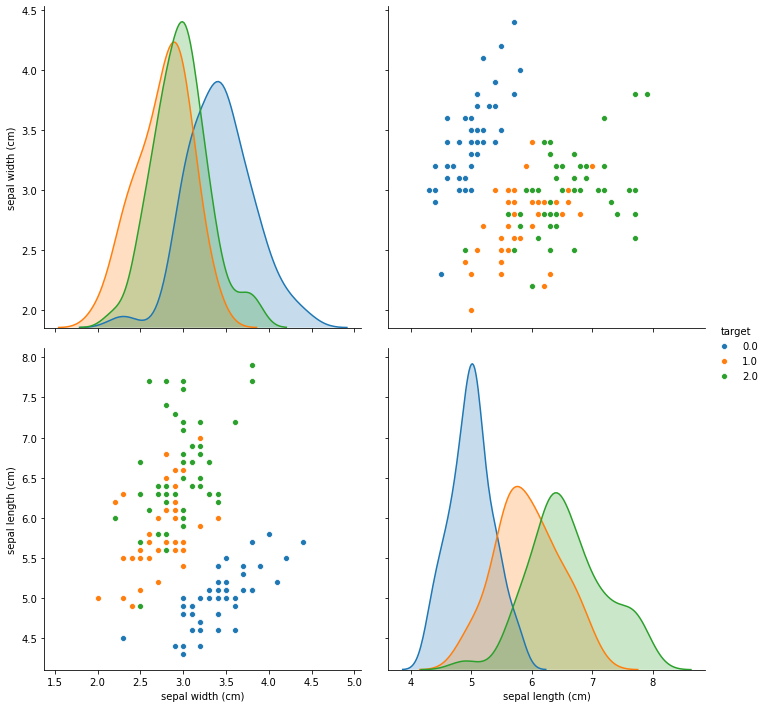

In [75]:
# ...

# QQ-Plot

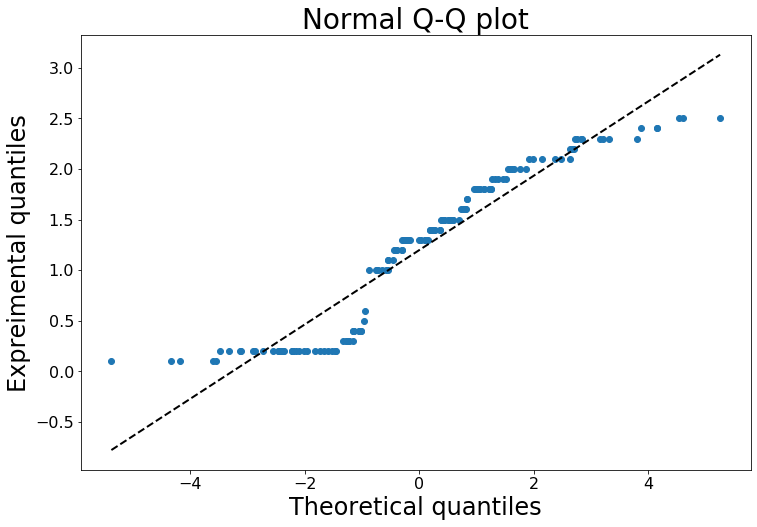

In [88]:
import numpy as np
import numpy.random as random
data = df['petal width (cm)'].values
data.sort()
norm=random.normal(0,2,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.plot(norm,data,"o")
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

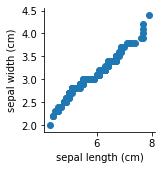

In [89]:
#!pip install seaborn_qqplot
import seaborn_qqplot as sqp
import seaborn as sns
sqp.qqplot(df, x='sepal length (cm)', y='sepal width (cm)')

# Ex 4. Andrews Plot

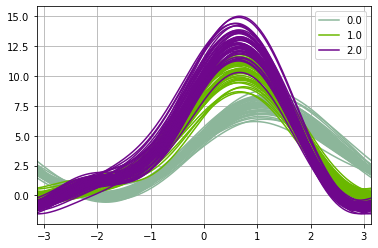

In [90]:
#

# PCA Plot

In [119]:
from sklearn import decomposition
X = df.drop(['target'],axis=1)
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
pca.explained_variance_ratio_

array([0.91568018, 0.05672904])

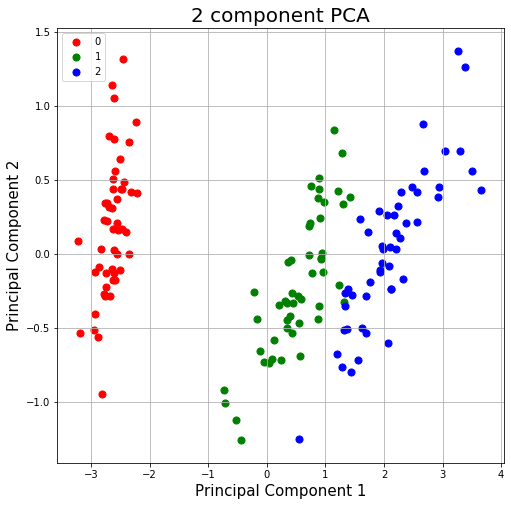

In [120]:
finalDf = pd.concat([pd.DataFrame(X), df['target']], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#Bi Plot

In [0]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

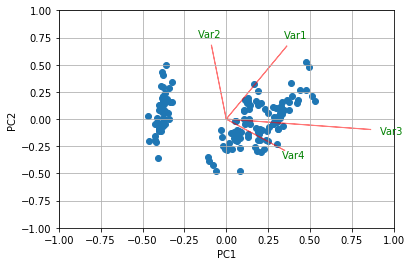

In [145]:
biplot(X,np.transpose(pca.components_[0:2, :]))

# MDS

In [0]:
from sklearn.manifold import MDS
X = df.drop(['target'],axis=1)
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X)

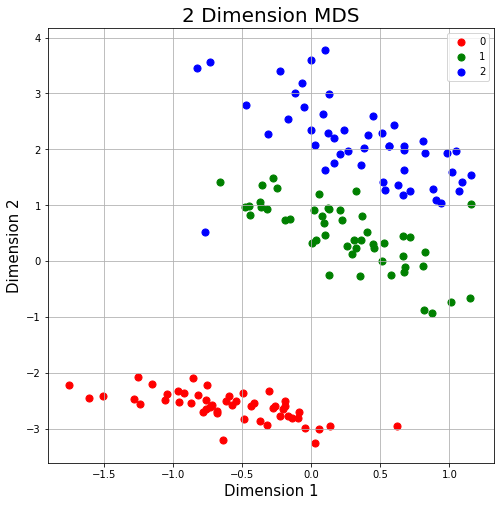

In [159]:
finalDf = pd.concat([pd.DataFrame(X_transformed), df['target']], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2 Dimension MDS', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#Ex. 5 t-SNE

# Ex. 6 SOM

# Ex. 7 Hierrarchical Clustering & Dendogram


